In [166]:
import json
import csv
import pandas as pd
import numpy as np
import scipy as sci
import keras
from keras.models import Sequential
from keras import regularizers
from keras.layers.core import Dense, Activation
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import io
import requests
import tensorflow as tf
from scipy import sparse
from sklearn.model_selection import train_test_split
import sklearn.feature_extraction.text as sk_text
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil
import os

# Data PreProcessing

In [2]:
#Read network_intrusion_data.csv file and load data into network_df dataframe 
network_df= pd.read_csv('network_intrusion_data.csv')

In [3]:
#Drop any row with missing values
network_df = network_df.dropna()

In [4]:
#Add column headers to the data in the dataframe
network_df.columns = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

In [5]:
#Select only relevant columns for processing
features_df = network_df[['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
                          
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
                          
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']]

In [6]:
label_df = network_df[['outcome']]

In [7]:
#Normalize numeric features

def normalize_numeric_minmax(df, name):
    if(df[name].max() > 0):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
    else:
        df[name] = df[name].astype(np.float32)
    
normalize_numeric_minmax(features_df,"duration") 
normalize_numeric_minmax(features_df,"src_bytes") 
normalize_numeric_minmax(features_df,"dst_bytes") 
normalize_numeric_minmax(features_df,"wrong_fragment") 
normalize_numeric_minmax(features_df,"urgent") 

normalize_numeric_minmax(features_df,"hot") 
normalize_numeric_minmax(features_df,"num_failed_logins") 
normalize_numeric_minmax(features_df,"num_compromised") 
normalize_numeric_minmax(features_df,"num_root") 
normalize_numeric_minmax(features_df,"num_file_creations") 
normalize_numeric_minmax(features_df,"num_shells") 
normalize_numeric_minmax(features_df,"num_access_files") 
normalize_numeric_minmax(features_df,"num_outbound_cmds") 

normalize_numeric_minmax(features_df,"count") 
normalize_numeric_minmax(features_df,"srv_count") 
normalize_numeric_minmax(features_df,"serror_rate") 
normalize_numeric_minmax(features_df,"srv_serror_rate") 
normalize_numeric_minmax(features_df,"rerror_rate") 
normalize_numeric_minmax(features_df,"srv_rerror_rate")  
normalize_numeric_minmax(features_df,"same_srv_rate") 
normalize_numeric_minmax(features_df,"diff_srv_rate") 
normalize_numeric_minmax(features_df,"srv_diff_host_rate") 
normalize_numeric_minmax(features_df,"dst_host_count") 
normalize_numeric_minmax(features_df,"dst_host_srv_count") 
normalize_numeric_minmax(features_df,"dst_host_same_srv_rate") 
normalize_numeric_minmax(features_df,"dst_host_diff_srv_rate") 
normalize_numeric_minmax(features_df,"dst_host_same_src_port_rate") 
normalize_numeric_minmax(features_df,"dst_host_srv_diff_host_rate") 
normalize_numeric_minmax(features_df,"dst_host_serror_rate") 
normalize_numeric_minmax(features_df,"dst_host_srv_serror_rate") 
normalize_numeric_minmax(features_df,"dst_host_rerror_rate") 
normalize_numeric_minmax(features_df,"dst_host_srv_rerror_rate") 



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [20]:
# one-hot cooding of categorical columns

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name]).astype(np.float32)
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(features_df,"protocol_type") 
encode_text_dummy(features_df,"service") 
encode_text_dummy(features_df,"flag") 
encode_text_dummy(features_df,"land") 

encode_text_dummy(features_df,"logged_in") 
encode_text_dummy(features_df,"root_shell") 
encode_text_dummy(features_df,"su_attempted") 
encode_text_dummy(features_df,"is_host_login") 
encode_text_dummy(features_df,"is_guest_login") 

KeyError: 'protocol_type'

In [9]:
features_df = features_df[0:10000]

In [10]:
label_df = label_df[0:10000]

In [11]:
# create a function called encodeLabelBinarizer

encodeLabelBinary = lambda x: 0 if x == 'normal.' else 1


In [12]:
# converting problem to binary classification

label_df['outcome'] = label_df['outcome'].apply(encodeLabelBinary)

# SKLEARN models - Classification - Training and Prediction

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features_df, label_df['outcome'] , test_size=0.2, random_state=42)

** Logistic Regression **

In [14]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

Log_reg_model = LogisticRegression()

Log_reg_model.fit(x_train, y_train)

y_pred_logistic = Log_reg_model.predict(x_test)

In [15]:
# RMS value

score_logistic = np.sqrt(mean_squared_error(y_test, y_pred_logistic))
print("Root Mean Squared Error: %.2f" % score_logistic)
print('R2 score: %.2f' % r2_score(y_test, y_pred_logistic))

Root Mean Squared Error: 0.04
R2 score: 0.99


** KNN **

In [16]:
#implementing Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train, y_train) 

y_pred_knn = knn.predict(x_test)

In [17]:
# Metrics
from sklearn import metrics

score_knn_acc = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy score: {}".format(score_knn_acc))

score_knn_precision = metrics.precision_score(y_test, y_pred_knn, average= "weighted")
print("Precision score: {}".format(score_knn_precision))

score_knn_recall = metrics.recall_score(y_test, y_pred_knn, average= "weighted")
print("Recall score: {}".format(score_knn_recall))

score_knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
print("F1 score: {}".format(score_knn_f1))

Accuracy score: 0.998
Precision score: 0.9980051085568328
Recall score: 0.998
F1 score: 0.9979966916164151


** SVM **

In [18]:
# SVM
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")

svm_model.fit(x_train, y_train)

y_pred_svm = svm_model.predict(x_test)

In [19]:
# Metrics

score_svm_acc = metrics.accuracy_score(y_test, y_pred_svm)
print("Accuracy score: {}".format(score_svm_acc))

score_svm_precision = metrics.precision_score(y_test, y_pred_svm, average= "weighted")
print("Precision score: {}".format(score_svm_precision))

score_svm_recall = metrics.recall_score(y_test, y_pred_svm, average= "weighted")
print("Recall score: {}".format(score_svm_recall))

score_svm_f1 = metrics.f1_score(y_test, y_pred_svm, average= "weighted")
print("F1 score: {}".format(score_svm_f1))

Accuracy score: 0.9985
Precision score: 0.998502875399361
Recall score: 0.9985
F1 score: 0.9984981422199071


** Gaussian Naive Bayes **

In [20]:
#GNB
from sklearn.naive_bayes import GaussianNB
mnb_model = GaussianNB()

mnb_model.fit(x_train, y_train)

y_pred_gnb = mnb_model.predict(x_test)

In [21]:
# Metrics

score_gnb_acc = metrics.accuracy_score(y_test, y_pred_gnb)
print("Accuracy score: {}".format(score_gnb_acc))

score_gnb_precision = metrics.precision_score(y_test, y_pred_gnb, average= "weighted")
print("Precision score: {}".format(score_gnb_precision))

score_gnb_recall = metrics.recall_score(y_test, y_pred_gnb, average= "weighted")
print("Recall score: {}".format(score_gnb_recall))

score_gnb_f1 = metrics.f1_score(y_test, y_pred_gnb, average= "weighted")
print("F1 score: {}".format(score_gnb_f1))

Accuracy score: 0.996
Precision score: 0.9960094405594406
Recall score: 0.996
F1 score: 0.9960032745786752


# Training and Prediction using Fully Connected Neural Network

In [22]:
normalize_numeric_minmax(network_df,"duration")
encode_text_dummy(network_df,"protocol_type") 
encode_text_dummy(network_df,"service") 
encode_text_dummy(network_df,"flag")
normalize_numeric_minmax(network_df,"src_bytes") 
normalize_numeric_minmax(network_df,"dst_bytes")
encode_text_dummy(network_df,"land")
normalize_numeric_minmax(network_df,"wrong_fragment") 
normalize_numeric_minmax(network_df,"urgent")
normalize_numeric_minmax(network_df,"hot")
normalize_numeric_minmax(network_df,"num_failed_logins")
encode_text_dummy(network_df,"logged_in")
normalize_numeric_minmax(network_df,"num_compromised")
normalize_numeric_minmax(network_df,"root_shell")
normalize_numeric_minmax(network_df,"su_attempted")
normalize_numeric_minmax(network_df,"num_root")
normalize_numeric_minmax(network_df,"num_file_creations")
normalize_numeric_minmax(network_df,"num_shells")
normalize_numeric_minmax(network_df,"num_access_files")
normalize_numeric_minmax(network_df,"num_outbound_cmds")
encode_text_dummy(network_df,"is_host_login")
encode_text_dummy(network_df,"is_guest_login")
normalize_numeric_minmax(network_df,"count") 
normalize_numeric_minmax(network_df,"srv_count") 
normalize_numeric_minmax(network_df,"serror_rate") 
normalize_numeric_minmax(network_df,"srv_serror_rate") 
normalize_numeric_minmax(network_df,"rerror_rate") 
normalize_numeric_minmax(network_df,"srv_rerror_rate") 
normalize_numeric_minmax(network_df,"same_srv_rate") 
normalize_numeric_minmax(network_df,"diff_srv_rate") 
normalize_numeric_minmax(network_df,"srv_diff_host_rate") 
normalize_numeric_minmax(network_df,"dst_host_count") 
normalize_numeric_minmax(network_df,"dst_host_srv_count") 
normalize_numeric_minmax(network_df,"dst_host_same_srv_rate") 
normalize_numeric_minmax(network_df,"dst_host_diff_srv_rate") 
normalize_numeric_minmax(network_df,"dst_host_same_src_port_rate") 
normalize_numeric_minmax(network_df,"dst_host_srv_diff_host_rate") 
normalize_numeric_minmax(network_df,"dst_host_serror_rate") 
normalize_numeric_minmax(network_df,"dst_host_srv_serror_rate") 
normalize_numeric_minmax(network_df,"dst_host_rerror_rate") 
normalize_numeric_minmax(network_df,"dst_host_srv_rerror_rate") 

In [24]:
network_df['outcome'] = network_df['outcome'].apply(encodeLabelBinary)

In [17]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [25]:
x,y=to_xy(network_df,'outcome')

In [26]:
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(x,y, test_size=0.2, random_state=42)

In [27]:
x_train_tf.shape

(395216, 121)

In [28]:
y_train_tf.shape

(395216, 2)

** ReLU, adam, 4 hidden layers **


In [27]:
# set up checkpointer and complete this
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential

checkpointer_relu = ModelCheckpoint(filepath="./best_weights_relu_4l.hdf5", verbose=1, save_best_only=True)

# Training and Prediction using CNN

In [29]:
# we now reshape the x_train and x_test to image form used in CNN 2D
x_train_tf = x_train_tf.reshape(x_train_tf.shape[0], 1, 121, 1)
x_test_tf = x_test_tf.reshape(x_test_tf.shape[0], 1, 121, 1)

In [30]:
x_train_tf.shape

(395216, 1, 121, 1)

In [31]:
x_test_tf.shape

(98804, 1, 121, 1)

In [32]:
#CNN 2D

cnn = Sequential()

# Conv2D layer 1
cnn.add(Conv2D(41, kernel_size=(1, 3), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=(1,121,1)))

In [34]:
cnn.add(Conv2D(64, (1, 3), activation='relu'))

cnn.add(MaxPooling2D(pool_size=(1, 2), strides=None))

cnn.add(Dropout(0.25))

cnn.add(Flatten())

In [35]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 119, 41)        164       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 117, 64)        7936      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 58, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 58, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 56, 64)         12352     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 28, 64)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 28, 64)         0         
__________

In [36]:
cnn.add(Dense(128, activation='relu'))

cnn.add(Dropout(0.5))

cnn.add(Dense(2, activation='softmax'))

In [37]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 119, 41)        164       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 117, 64)        7936      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 58, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 58, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 56, 64)         12352     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 28, 64)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 28, 64)         0         
__________

In [38]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [41]:
cnn.fit(x_train_tf, y_train_tf,     
          batch_size=128,
          epochs=10,
          verbose=2,
          validation_data=(x_test_tf, y_test_tf))

Train on 395216 samples, validate on 98804 samples
Epoch 1/10
 - 107s - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0035 - val_acc: 0.9991
Epoch 2/10
 - 106s - loss: 0.0042 - acc: 0.9988 - val_loss: 0.0031 - val_acc: 0.9992
Epoch 3/10
 - 105s - loss: 0.0035 - acc: 0.9989 - val_loss: 0.0026 - val_acc: 0.9993
Epoch 4/10
 - 105s - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0023 - val_acc: 0.9993
Epoch 5/10
 - 108s - loss: 0.0029 - acc: 0.9991 - val_loss: 0.0023 - val_acc: 0.9993
Epoch 6/10
 - 107s - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0022 - val_acc: 0.9994
Epoch 7/10
 - 105s - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0019 - val_acc: 0.9994
Epoch 8/10
 - 106s - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0020 - val_acc: 0.9994
Epoch 9/10
 - 105s - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0020 - val_acc: 0.9995
Epoch 10/10
 - 104s - loss: 0.0022 - acc: 0.9994 - val_loss: 0.0020 - val_acc: 0.9994


In [43]:
# Evaluate Accuracy in Keras
score = cnn.evaluate(x_test_tf, y_test_tf, verbose=0)
score

[0.0019513580828121894, 0.9994129792316101]

In [44]:
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.0019513580828121894
Test accuracy: 0.9994129792316101


# Additional Features

 # Remove Redundant Records

In [ ]:
network_df.drop_duplicates(keep='first', inplace=True)

In [ ]:
network_df

In [ ]:
#Select only relevant columns for processing
features_ad_df = network_df[['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
                          
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
                          
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']]

In [ ]:
label_ad_df = network_df[['outcome']]

In [ ]:
#Normalize numeric features


def normalize_numeric_minmax(df, name):
    if(df[name].max() > 0):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
    else:
        df[name] = df[name].astype(np.float32)
    
normalize_numeric_minmax(features_ad_df,"duration") 
normalize_numeric_minmax(features_ad_df,"src_bytes") 
normalize_numeric_minmax(features_ad_df,"dst_bytes") 
normalize_numeric_minmax(features_ad_df,"wrong_fragment") 
normalize_numeric_minmax(features_ad_df,"urgent") 

normalize_numeric_minmax(features_ad_df,"hot") 
normalize_numeric_minmax(features_ad_df,"num_failed_logins") 
normalize_numeric_minmax(features_ad_df,"num_compromised") 
normalize_numeric_minmax(features_ad_df,"num_root") 
normalize_numeric_minmax(features_ad_df,"num_file_creations") 
normalize_numeric_minmax(features_ad_df,"num_shells") 
normalize_numeric_minmax(features_ad_df,"num_access_files") 
normalize_numeric_minmax(features_ad_df,"num_outbound_cmds") 

normalize_numeric_minmax(features_ad_df,"count") 
normalize_numeric_minmax(features_ad_df,"srv_count") 
normalize_numeric_minmax(features_ad_df,"serror_rate") 
normalize_numeric_minmax(features_ad_df,"srv_serror_rate") 
normalize_numeric_minmax(features_ad_df,"rerror_rate") 
normalize_numeric_minmax(features_ad_df,"srv_rerror_rate") 
normalize_numeric_minmax(features_ad_df,"same_srv_rate") 
normalize_numeric_minmax(features_ad_df,"diff_srv_rate") 
normalize_numeric_minmax(features_ad_df,"srv_diff_host_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_count") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_count") 
normalize_numeric_minmax(features_ad_df,"dst_host_same_srv_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_diff_srv_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_same_src_port_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_diff_host_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_serror_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_serror_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_rerror_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_rerror_rate") 



In [ ]:
# one-hot cooding of categorical columns

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name]).astype(np.float32)
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(features_ad_df,"protocol_type") 
encode_text_dummy(features_ad_df,"service") 
encode_text_dummy(features_ad_df,"flag") 
encode_text_dummy(features_ad_df,"land") 

encode_text_dummy(features_ad_df,"logged_in") 
encode_text_dummy(features_ad_df,"root_shell") 
encode_text_dummy(features_ad_df,"su_attempted") 
encode_text_dummy(features_ad_df,"is_host_login") 
encode_text_dummy(features_ad_df,"is_guest_login") 

In [ ]:
#Reduce the dataset size
features_ad_df = features_ad_df[0:40000]
label_ad_df = label_ad_df[0:40000]

In [ ]:
# create a function called encodeLabelBinarizer

encodeLabelBinary = lambda x: 0 if x == 'normal.' else 1


In [ ]:
label_ad_df['outcome'] = label_ad_df['outcome'].apply(encodeLabelBinary)

In [ ]:
x_ad_train, x_ad_test, y_ad_train, y_ad_test = train_test_split(features_ad_df, label_ad_df['outcome'] , test_size=0.2, random_state=42)

In [ ]:
features_ad_df.shape

**Logistic Regression **

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

Log_reg_model = LogisticRegression()

Log_reg_model.fit(x_ad_train, y_ad_train)

y_ad_pred_logistic = Log_reg_model.predict(x_ad_test)

In [ ]:
# RMS value

score_logistic = np.sqrt(mean_squared_error(y_ad_test, y_ad_pred_logistic))
print("Root Mean Squared Error: %.2f" % score_logistic)
print('R2 score: %.2f' % r2_score(y_ad_test, y_ad_pred_logistic))

** KNN **

In [ ]:
#implementing Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_ad_train, y_ad_train) 

y_ad_pred_knn = knn.predict(x_ad_test)

In [ ]:
# Metrics
from sklearn import metrics

score_ad_knn_acc = metrics.accuracy_score(y_ad_test, y_ad_pred_knn)
print("Accuracy score: {}".format(score_ad_knn_acc))

score_ad_knn_precision = metrics.precision_score(y_ad_test, y_ad_pred_knn, average= "weighted")
print("Precision score: {}".format(score_ad_knn_precision))

score_ad_knn_recall = metrics.recall_score(y_ad_test, y_ad_pred_knn, average= "weighted")
print("Recall score: {}".format(score_ad_knn_recall))

score_ad_knn_f1 = metrics.f1_score(y_ad_test, y_ad_pred_knn, average= "weighted")
print("F1 score: {}".format(score_ad_knn_f1))

** SVM **

In [ ]:
# SVM
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")

svm_model.fit(x_ad_train, y_ad_train)

y_ad_pred_svm = svm_model.predict(x_ad_test)

In [ ]:
# Metrics

score_ad_svm_acc = metrics.accuracy_score(y_ad_test, y_ad_pred_svm)
print("Accuracy score: {}".format(score_ad_svm_acc))

score_ad_svm_precision = metrics.precision_score(y_ad_test, y_ad_pred_svm, average= "weighted")
print("Precision score: {}".format(score_ad_svm_precision))

score_ad_svm_recall = metrics.recall_score(y_ad_test, y_ad_pred_svm, average= "weighted")
print("Recall score: {}".format(score_ad_svm_recall))

score_ad_svm_f1 = metrics.f1_score(y_ad_test, y_ad_pred_svm, average= "weighted")
print("F1 score: {}".format(score_ad_svm_f1))

** Gaussian Naive Bayes **

In [ ]:
#GNB
from sklearn.naive_bayes import GaussianNB
mnb_model = GaussianNB()

mnb_model.fit(x_ad_train, y_ad_train)

y_ad_pred_gnb = mnb_model.predict(x_ad_test)

In [ ]:
# Metrics

score_ad_gnb_acc = metrics.accuracy_score(y_ad_test, y_ad_pred_gnb)
print("Accuracy score: {}".format(score_ad_gnb_acc))

score_ad_gnb_precision = metrics.precision_score(y_ad_test, y_ad_pred_gnb, average= "weighted")
print("Precision score: {}".format(score_ad_gnb_precision))

score_ad_gnb_recall = metrics.recall_score(y_ad_test, y_ad_pred_gnb, average= "weighted")
print("Recall score: {}".format(score_ad_gnb_recall))

score_ad_gnb_f1 = metrics.f1_score(y_ad_test, y_ad_pred_gnb, average= "weighted")
print("F1 score: {}".format(score_ad_gnb_f1))

# Feature Importance Analysis

In [96]:
#Read network_intrusion_data.csv file and load data into network_df dataframe 
network_ad_df= pd.read_csv('network_intrusion_data.csv')

In [97]:
#Drop any row with missing values
network_ad_df = network_ad_df.dropna()

In [98]:
#Add column headers to the data in the dataframe
network_ad_df.columns = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

In [99]:
#Select input columns
features_ad_df = network_ad_df[['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
                          
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
                          
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate']]

In [100]:
label_ad_df = network_ad_df[['outcome']]

In [101]:
#Normalize numeric features

def normalize_numeric_minmax(df, name):
    if(df[name].max() > 0):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
    else:
        df[name] = df[name].astype(np.float32)
    
normalize_numeric_minmax(features_ad_df,"duration") 
normalize_numeric_minmax(features_ad_df,"src_bytes") 
normalize_numeric_minmax(features_ad_df,"dst_bytes") 
normalize_numeric_minmax(features_ad_df,"wrong_fragment") 
normalize_numeric_minmax(features_ad_df,"urgent") 

normalize_numeric_minmax(features_ad_df,"hot") 
normalize_numeric_minmax(features_ad_df,"num_failed_logins") 
normalize_numeric_minmax(features_ad_df,"num_compromised") 
normalize_numeric_minmax(features_ad_df,"num_root") 
normalize_numeric_minmax(features_ad_df,"num_file_creations") 
normalize_numeric_minmax(features_ad_df,"num_shells") 
normalize_numeric_minmax(features_ad_df,"num_access_files") 
normalize_numeric_minmax(features_ad_df,"num_outbound_cmds") 

normalize_numeric_minmax(features_ad_df,"count") 
normalize_numeric_minmax(features_ad_df,"srv_count") 
normalize_numeric_minmax(features_ad_df,"serror_rate") 
normalize_numeric_minmax(features_ad_df,"srv_serror_rate") 
normalize_numeric_minmax(features_ad_df,"rerror_rate") 
normalize_numeric_minmax(features_ad_df,"srv_rerror_rate") 
normalize_numeric_minmax(features_ad_df,"same_srv_rate") 
normalize_numeric_minmax(features_ad_df,"diff_srv_rate") 
normalize_numeric_minmax(features_ad_df,"srv_diff_host_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_count") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_count") 
normalize_numeric_minmax(features_ad_df,"dst_host_same_srv_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_diff_srv_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_same_src_port_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_diff_host_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_serror_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_serror_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_rerror_rate") 
normalize_numeric_minmax(features_ad_df,"dst_host_srv_rerror_rate") 



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [102]:
# one-hot cooding of categorical columns

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name]).astype(np.float32)
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(features_ad_df,"protocol_type") 
encode_text_dummy(features_ad_df,"service") 
encode_text_dummy(features_ad_df,"flag") 
encode_text_dummy(features_ad_df,"land") 

encode_text_dummy(features_ad_df,"logged_in") 
encode_text_dummy(features_ad_df,"root_shell") 
encode_text_dummy(features_ad_df,"su_attempted") 
encode_text_dummy(features_ad_df,"is_host_login") 
encode_text_dummy(features_ad_df,"is_guest_login") 

In [103]:
#Reduce the dataset size
features_ad_df = features_ad_df[0:40000]
label_ad_df = label_ad_df[0:40000]

In [104]:
# create a function called encodeLabelBinarizer

encodeLabelBinary = lambda x: 0 if x == 'normal.' else 1


In [105]:
label_ad_df['outcome'] = label_ad_df['outcome'].apply(encodeLabelBinary)

In [106]:
label_ad_df.head

<bound method NDFrame.head of        outcome
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
...        ...
39970        1
39971        1
39972        1
39973        1
39974        1
39975        1
39976        1
39977        1
39978        1
39979        1
39980        1
39981        1
39982        1
39983        1
39984        1
39985        1
39986        1
39987        1
39988        1
39989        1
39990        1
39991        1
39992        1
39993        1
39994        1
39995        1
39996        1
39997        1
39998        1
39999        1

[40000 rows x 1 columns]>

In [107]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

extraTreeClassifier = ExtraTreesClassifier()
extraTreeClassifier.fit(features_ad_df, label_ad_df['outcome'])

# display the relative importance of each attribute

print(extraTreeClassifier.feature_importances_)

[1.36660239e-04 4.40802091e-02 2.53000699e-03 9.17174013e-03
 2.44257720e-05 1.14005882e-02 1.35966720e-03 1.94034989e-02
 1.67870289e-04 7.53586884e-05 1.16707140e-04 5.58583575e-05
 0.00000000e+00 7.89496802e-03 1.10039018e-01 5.25608351e-05
 4.16993681e-06 6.42254462e-03 1.09493497e-02 2.13293593e-04
 1.57666276e-04 3.31947741e-04 2.33379662e-03 6.68623764e-03
 1.37079898e-03 6.10653738e-03 1.33700781e-01 1.40231594e-03
 3.68037571e-04 3.30974130e-04 3.74150198e-03 1.08032948e-02
 1.64028955e-01 1.27652812e-01 1.56604642e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.26275947e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.90421629e-05 2.17560006e-03 0.00000000e+00
 8.59193076e-07 2.65550557e-01 0.00000000e+00 0.00000000e+00
 1.05132966e-04 3.18910897e-05 1.89153319e-03 1.55058168e-04
 0.00000000e+00 2.55904927e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.008721

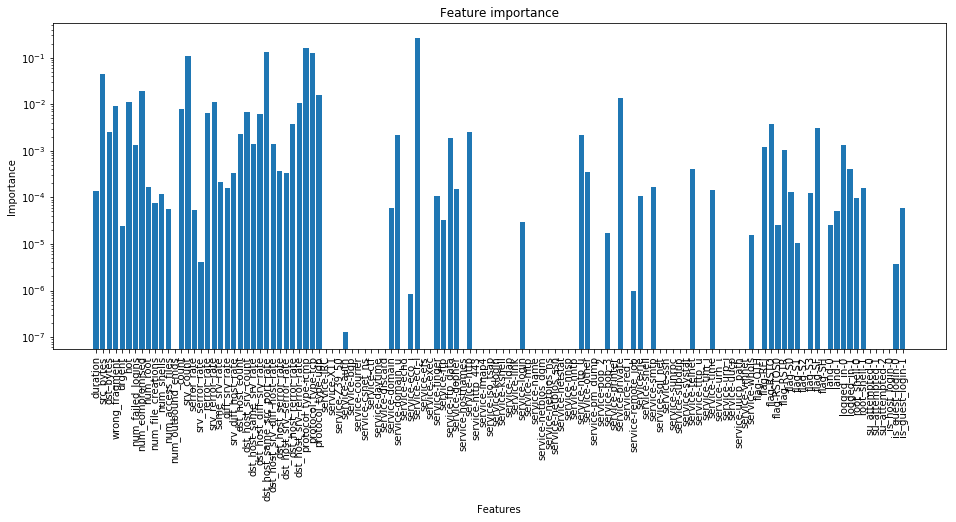

In [108]:
feature_importance = extraTreeClassifier.feature_importances_
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), features_ad_df, rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [109]:
##Choose only relevant features

from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(extraTreeClassifier, prefit=True)
X_new = model.transform(features_ad_df)
feature_idx = model.get_support()
feature_name = features_ad_df.columns[feature_idx]

In [110]:
feature_name

Index(['src_bytes', 'wrong_fragment', 'hot', 'num_compromised', 'srv_count',
       'srv_rerror_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_rerror_rate', 'protocol_type-icmp', 'protocol_type-tcp',
       'protocol_type-udp', 'service-ecr_i', 'service-private'],
      dtype='object')

In [111]:
X_new.shape

(40000, 13)

In [112]:
x_adf_train, x_adf_test, y_adf_train, y_adf_test = train_test_split(X_new, label_ad_df['outcome'] , test_size=0.2, random_state=42)

In [113]:
y_adf_test.shape

(8000,)

**Logistic Regression**

In [63]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

Log_reg_model = LogisticRegression()

Log_reg_model.fit(x_adf_train, y_adf_train)

y_adf_pred_logistic = Log_reg_model.predict(x_adf_test)

In [67]:

print('Accuracy: %.2f' % accuracy_score(y_adf_test, y_adf_pred_logistic))

Accuracy: 0.99


** KNN ** 

In [ ]:
#implementing Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_adf_train, y_adf_train) 

y_adf_pred_knn = knn.predict(x_adf_test)

In [ ]:
# Metrics
from sklearn import metrics

score_adf_knn_acc = metrics.accuracy_score(y_adf_test, y_adf_pred_knn)
print("Accuracy score: {}".format(score_adf_knn_acc))

score_adf_knn_precision = metrics.precision_score(y_adf_test, y_adf_pred_knn, average= "weighted")
print("Precision score: {}".format(score_ad_knn_precision))

score_adf_knn_recall = metrics.recall_score(y_adf_test, y_adf_pred_knn, average= "weighted")
print("Recall score: {}".format(score_ad_knn_recall))

score_adf_knn_f1 = metrics.f1_score(y_adf_test, y_adf_pred_knn, average= "weighted")
print("F1 score: {}".format(score_adf_knn_f1))

** SVM ** 

In [ ]:
# SVM
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")

svm_model.fit(x_adf_train, y_adf_train)

y_adf_pred_svm = svm_model.predict(x_adf_test)

In [ ]:
# Metrics

score_adf_svm_acc = metrics.accuracy_score(y_adf_test, y_adf_pred_svm)
print("Accuracy score: {}".format(score_adf_svm_acc))

score_adf_svm_precision = metrics.precision_score(y_adf_test, y_adf_pred_svm, average= "weighted")
print("Precision score: {}".format(score_adf_svm_precision))

score_adf_svm_recall = metrics.recall_score(y_adf_test, y_adf_pred_svm, average= "weighted")
print("Recall score: {}".format(score_ad_svm_recall))

score_adf_svm_f1 = metrics.f1_score(y_adf_test, y_adf_pred_svm, average= "weighted")
print("F1 score: {}".format(score_ad_svm_f1))

** Gaussian Naive Bayes **

In [ ]:
#GNB
from sklearn.naive_bayes import GaussianNB
mnb_model = GaussianNB()

mnb_model.fit(x_adf_train, y_adf_train)

y_adf_pred_gnb = mnb_model.predict(x_adf_test)

In [ ]:
# Metrics

score_adf_gnb_acc = metrics.accuracy_score(y_adf_test, y_adf_pred_gnb)
print("Accuracy score: {}".format(score_ad_gnb_acc))

score_adf_gnb_precision = metrics.precision_score(y_adf_test, y_adf_pred_gnb, average= "weighted")
print("Precision score: {}".format(score_ad_gnb_precision))

score_adf_gnb_recall = metrics.recall_score(y_adf_test, y_adf_pred_gnb, average= "weighted")
print("Recall score: {}".format(score_ad_gnb_recall))

score_adf_gnb_f1 = metrics.f1_score(y_adf_test, y_adf_pred_gnb, average= "weighted")
print("F1 score: {}".format(score_ad_gnb_f1))

** CNN **

<bound method NDFrame.head of        outcome-0  outcome-1
0            1.0        0.0
1            1.0        0.0
2            1.0        0.0
3            1.0        0.0
4            1.0        0.0
5            1.0        0.0
6            1.0        0.0
7            1.0        0.0
8            1.0        0.0
9            1.0        0.0
10           1.0        0.0
11           1.0        0.0
12           1.0        0.0
13           1.0        0.0
14           1.0        0.0
15           1.0        0.0
16           1.0        0.0
17           1.0        0.0
18           1.0        0.0
19           1.0        0.0
20           1.0        0.0
21           1.0        0.0
22           1.0        0.0
23           1.0        0.0
24           1.0        0.0
25           1.0        0.0
26           1.0        0.0
27           1.0        0.0
28           1.0        0.0
29           1.0        0.0
...          ...        ...
39970        0.0        1.0
39971        0.0        1.0
39972        0.0  

In [143]:
x_adf_train1, x_adf_test1, y_adf_train1, y_adf_test1 = train_test_split(X_new, pd.get_dummies(label_ad_df['outcome']).values.astype(np.float32) , test_size=0.2, random_state=42)



In [144]:
x_adf_train1.shape

(32000, 13)

In [145]:
x_adf_train1 = x_adf_train1.reshape(x_adf_train1.shape[0], 1, 13, 1)
x_adf_test1 = x_adf_test1.reshape(x_adf_test1.shape[0], 1, 13, 1)

In [146]:
x_adf_train1.shape

(32000, 1, 13, 1)

In [147]:
y_adf_test1.shape

(8000, 2)

In [148]:
cnn = Sequential()

# Conv2D layer 1
cnn.add(Conv2D(41, kernel_size=(1, 3), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=(1,13,1)))
cnn.add(Conv2D(64, (1, 3), activation='relu'))

cnn.add(MaxPooling2D(pool_size=(1, 2), strides=None))

cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))

cnn.add(Dropout(0.5))

cnn.add(Dense(2, activation='softmax'))

In [149]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 1, 11, 41)         164       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 9, 64)          7936      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 4, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
__________

In [150]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [151]:
cnn.fit(x_adf_train1, y_adf_train1,     
          batch_size=128,
          epochs=10,
          verbose=2,
          validation_data=(x_adf_test1, y_adf_test1))

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
 - 1s - loss: 0.0846 - acc: 0.9802 - val_loss: 0.0346 - val_acc: 0.9914
Epoch 2/10
 - 1s - loss: 0.0311 - acc: 0.9909 - val_loss: 0.0131 - val_acc: 0.9948
Epoch 3/10
 - 1s - loss: 0.0128 - acc: 0.9961 - val_loss: 0.0087 - val_acc: 0.9971
Epoch 4/10
 - 1s - loss: 0.0102 - acc: 0.9970 - val_loss: 0.0082 - val_acc: 0.9972
Epoch 5/10
 - 1s - loss: 0.0095 - acc: 0.9969 - val_loss: 0.0081 - val_acc: 0.9971
Epoch 6/10
 - 1s - loss: 0.0080 - acc: 0.9977 - val_loss: 0.0078 - val_acc: 0.9969
Epoch 7/10
 - 1s - loss: 0.0081 - acc: 0.9973 - val_loss: 0.0080 - val_acc: 0.9972
Epoch 8/10
 - 1s - loss: 0.0074 - acc: 0.9978 - val_loss: 0.0081 - val_acc: 0.9978
Epoch 9/10
 - 1s - loss: 0.0078 - acc: 0.9978 - val_loss: 0.0075 - val_acc: 0.9975
Epoch 10/10
 - 1s - loss: 0.0072 - acc: 0.9978 - val_loss: 0.0075 - val_acc: 0.9974


In [152]:
# Evaluate Accuracy in Keras
score = cnn.evaluate(x_adf_test1, y_adf_test1, verbose=0)
score

[0.007466521507449215, 0.997375]

In [153]:
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.007466521507449215
Test accuracy: 0.997375


In [154]:
pred = cnn.predict(x_adf_test1)
pred = np.argmax(pred,axis=1)

In [155]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
y_true = np.argmax(y_adf_test1,axis=1)
y_true

array([0, 0, 0, ..., 0, 0, 0])

In [159]:
cm_cnn = confusion_matrix(y_true, pred)
print(cm_cnn)

[[7174    9]
 [  12  805]]


In [161]:
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_



outcome = encode_text_index(label_ad_df,'outcome')

Plotting confusion matrix


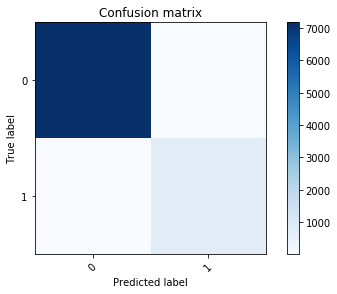

In [163]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm_cnn, outcome)
plt.show()

In [164]:
print(classification_report(y_true, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7183
          1       0.99      0.99      0.99       817

avg / total       1.00      1.00      1.00      8000



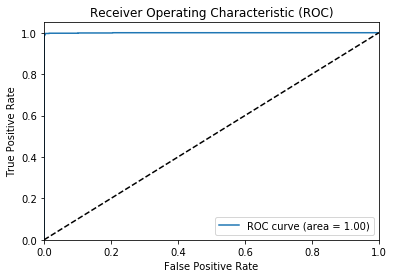

In [167]:
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
    
pred = cnn.predict(x_adf_test1)
pred = pred[:,1]
plot_roc(pred,y_true)